# 1. DATA SUMMARY

1. Housing Finance company which provide home loans for the houses that are present across all urban, semiurban and rural areas for their valued customers.
2. The company validates the eligibility of loan after customer applies for the loan. However, it consumes lot of time for the manual validation of eligibility process.
3. Hence, the company wants to automate the loan elibility process based on the customer information and identify the factors/customer segments who are eligible for taking the loan.
4. As banks would give loans to only those customers who are eligible so that they can be assured of getting the money back.
5. Hence, the more accurate we are in predicting the eligible customers, the more beneficial it would be for the company.

# 2. PROBLEM STATEMENT

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

# 3. TYPE OF PROBLEM

The above problem is clearly classification problem as we need to classify whether the Loan_Status is yes or no. So this can be solved by any of the classification techniques like Logistic Regression, Random Forest , Decision Tree , SVM etc.

#### Lets look at some assumptions before stepping into the further steps
- The applicants who are graduated have a higher chance of loan approval than the non-graduate applicants.
- The applicants with high income have a high chance of loan approval.
- The lesser the loan amount, the higher chances of loan getting approved.

# 4. IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
    
import warnings
warnings.filterwarnings('ignore')

# 5. IMPORTING DATASET

In [2]:
home_loan_train = pd.read_csv('Train_Loan_Home.csv')
home_loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 6. DATA UNDERSTANDING

The data has 614 rows and 13 columns.

### Initial Analysis

In [3]:
home_loan_train.shape #to find the number of rows and columns

(614, 13)

In [4]:
home_loan_train.info() #to get more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
home_loan_train.describe(include='all') #to get the complete descriptive statistics.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
home_loan_train.columns #returns all of the column labels of the given dataframe.

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
home_loan_train.isna().sum() #to check if the dataset contains any null or missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

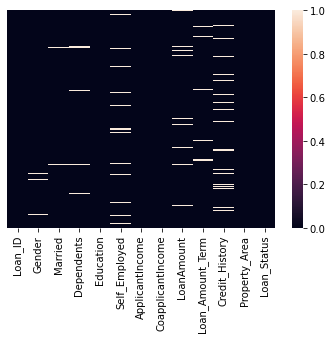

In [8]:
sns.heatmap(home_loan_train.isna(),yticklabels=False,cbar=True) #heatmap to identify the features having null values.
plt.show()

# 7. EXPLORATORY DATA ANALYSIS

In [9]:
home_loan_train.drop(labels='Loan_ID',axis=1,inplace=True)

In [10]:
X = home_loan_train.drop('Loan_Status',axis=1)
y = home_loan_train['Loan_Status']

In [11]:
X['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
X['Dependents'] = X['Dependents'].str.replace('+','')

In [13]:
X['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

##### Separating numerical and categorical features

In [14]:
numerical_data = X.select_dtypes(include=[np.number])
categorical_data = X.select_dtypes(exclude=[np.number])

In [15]:
numerical_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [16]:
categorical_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

##### Handling Missing Values

To handle the null values:
1. For the Categorical Features the null values will be replaced by the mode value.
2. For the Numerical features the null values will be replaced by the mean or by the median value.

In [17]:
X['Gender']=X['Gender'].fillna(X['Gender'].mode()[0])
X['Married']=X['Married'].fillna(X['Married'].mode()[0])
X['Dependents']=X['Dependents'].fillna(X['Dependents'].mode()[0])
X['Education']=X['Education'].fillna(X['Education'].mode()[0])
X['Self_Employed']=X['Self_Employed'].fillna(X['Self_Employed'].mode()[0])
X['Property_Area']=X['Property_Area'].fillna(X['Property_Area'].mode()[0])

In [18]:
X['ApplicantIncome'] = X['ApplicantIncome'].fillna(X['ApplicantIncome'].mean())
X['CoapplicantIncome'] = X['CoapplicantIncome'].fillna(X['CoapplicantIncome'].mean())
X['LoanAmount'] = X['LoanAmount'].fillna(X['LoanAmount'].mean())
X['Loan_Amount_Term'] = X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mean())
X['Credit_History'] = X['Credit_History'].fillna(X['Credit_History'].mean())

In [19]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**All the null values have been removed**

In [20]:
X.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [21]:
X['Dependents'] = X['Dependents'].astype('int')

In [22]:
X.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [23]:
X.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614,614,614.000000,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban
freq,502,401,NaN,480,532,NaN,NaN,NaN,NaN,NaN,233
mean,NaN,NaN,0.744300,NaN,NaN,5403.459283,1621.245798,146.412162,342.000000,0.842199,NaN
std,NaN,NaN,1.009623,NaN,NaN,6109.041673,2926.248369,84.037468,64.372489,0.349681,NaN
min,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN


In [24]:
X['Gender']=X['Gender'].map({'Female':0,'Male':1})

In [25]:
X['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [26]:
X['Married']=X['Married'].map({'No':0,'Yes':1})

In [27]:
X['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [28]:
X['Education']=X['Education'].map({'Not Graduate':0,'Graduate':1})

In [29]:
X['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [30]:
X['Property_Area']=X['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})

In [31]:
X['Property_Area'].value_counts()

0    233
1    202
2    179
Name: Property_Area, dtype: int64

In [32]:
X['Self_Employed']=X['Self_Employed'].map({'No':0,'Yes':1})

In [33]:
X['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [34]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1


In [35]:
cleaned_loan_data = pd.concat([X,y], axis=1, ignore_index=False)
cleaned_loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,Y
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,Y
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,Y
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,Y
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,Y


<AxesSubplot:xlabel='Gender', ylabel='Married'>

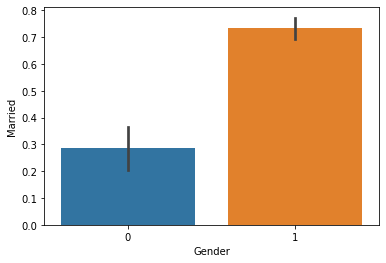

In [36]:
sns.barplot('Gender','Married',data=X)

<AxesSubplot:xlabel='Gender', ylabel='Dependents'>

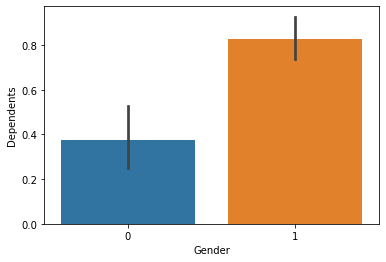

In [37]:
sns.barplot('Gender','Dependents',data=X)

<AxesSubplot:xlabel='Gender', ylabel='Education'>

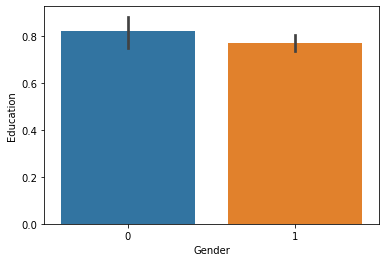

In [38]:
sns.barplot('Gender','Education',data=X)

<AxesSubplot:xlabel='Married', ylabel='Self_Employed'>

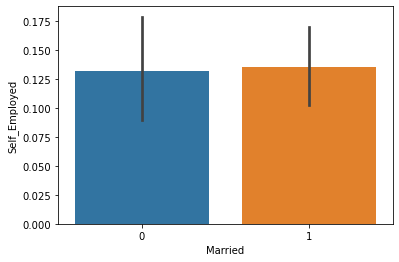

In [39]:
sns.barplot('Married','Self_Employed',data=X)

<AxesSubplot:xlabel='Gender', ylabel='Self_Employed'>

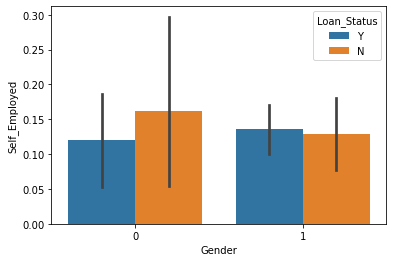

In [40]:
sns.barplot('Gender','Self_Employed',data=cleaned_loan_data,hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='Dependents'>

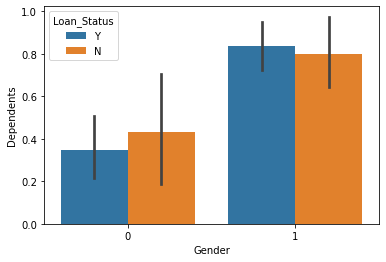

In [41]:
sns.barplot('Gender','Dependents',data=cleaned_loan_data,hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='Married'>

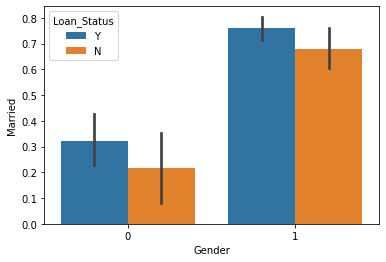

In [42]:
sns.barplot('Gender','Married',data=cleaned_loan_data,hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

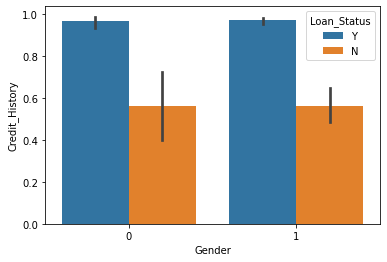

In [43]:
sns.barplot('Gender','Credit_History',data=cleaned_loan_data,hue='Loan_Status')

In [44]:
cleaned_loan_data_matrix = cleaned_loan_data.corr().round(2)
cleaned_loan_data_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.00,0.36,0.17,-0.05,-0.00,0.06,0.08,0.11,-0.07,0.01,0.11
Married,0.36,1.00,0.33,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,-0.01
Dependents,0.17,0.33,1.00,-0.06,0.06,0.12,0.03,0.16,-0.10,-0.04,-0.00
Education,-0.05,-0.01,-0.06,1.00,0.01,0.14,0.06,0.17,0.08,0.08,-0.07
Self_Employed,-0.00,0.00,0.06,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,0.01
ApplicantIncome,0.06,0.05,0.12,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.01,0.02
CoapplicantIncome,0.08,0.08,0.03,0.06,-0.02,-0.12,1.00,0.19,-0.06,-0.00,0.02
LoanAmount,0.11,0.15,0.16,0.17,0.12,0.57,0.19,1.00,0.04,-0.01,0.03
Loan_Amount_Term,-0.07,-0.10,-0.10,0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,-0.02
Credit_History,0.01,0.01,-0.04,0.08,-0.00,-0.01,-0.00,-0.01,0.00,1.00,-0.04


<AxesSubplot:>

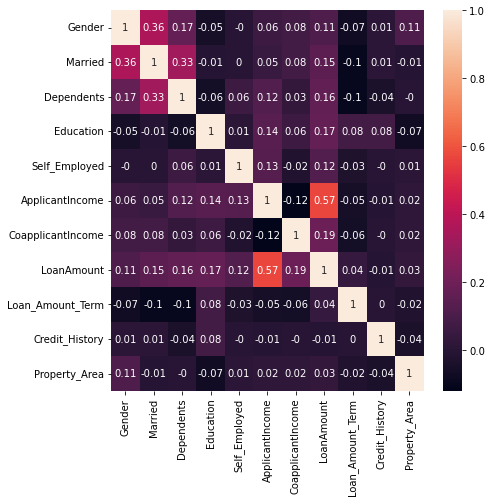

In [45]:
plt.figure(figsize=(7,7))
sns.heatmap(data=cleaned_loan_data_matrix,annot=True)

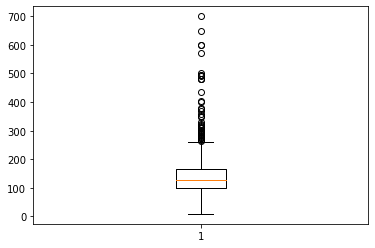

In [46]:
plt.boxplot(x='LoanAmount',data=X)
plt.show()

In [47]:
X.loc[X['LoanAmount']>200,'LoanAmount'] = np.mean(X['LoanAmount'])
X.loc[X['LoanAmount']<50,'LoanAmount'] = np.mean(X['LoanAmount'])

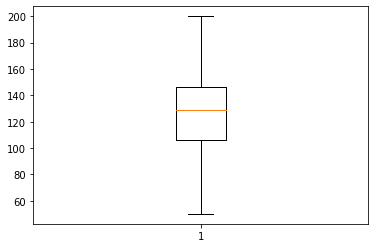

In [48]:
plt.boxplot(x='LoanAmount',data=X)
plt.show()

In [49]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2
610,1,1,3,1,0,4106,0.0,124.868144,180.0,1.0,2
611,1,1,1,1,0,8072,240.0,146.412162,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1


In [50]:
X.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,127.634422,342.000000,0.842199,0.912052
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,32.760291,64.372489,0.349681,0.815081
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,50.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,106.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,146.412162,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,200.000000,480.000000,1.000000,2.000000


In [51]:
y=home_loan_train[['Loan_Status']]
y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['Loan_Status']= le.fit_transform(y['Loan_Status'])
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# 8. MODEL BUILDING

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12,shuffle=True)

In [54]:
X_train.shape,y_train.shape

((491, 11), (491, 1))

In [55]:
X_test.shape,y_test.shape

((123, 11), (123, 1))

The following models will the applied on the data:
1. Logistic Regression
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Gradient boosting Classifier

# 9. MODEL TRAINING

In [56]:
log_model = LogisticRegression()
svc_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

### Training time analysis

In [57]:
%%time
log_model.fit(X_train,y_train)

CPU times: total: 125 ms
Wall time: 66.1 ms


LogisticRegression()

In [58]:
%%time
svc_model.fit(X_train,y_train)

CPU times: total: 93.8 ms
Wall time: 34.1 ms


SVC()

In [59]:
%%time
dt_model.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 7.18 ms


DecisionTreeClassifier()

In [60]:
%%time
rf_model.fit(X_train,y_train)

CPU times: total: 359 ms
Wall time: 375 ms


RandomForestClassifier()

In [61]:
%%time
gb_model.fit(X_train,y_train)

CPU times: total: 234 ms
Wall time: 241 ms


GradientBoostingClassifier()

# 10. MODEL TESTING

##### For training data

In [62]:
y_pred_train_log_model = log_model.predict(X_train)
y_pred_train_svc = svc_model.predict(X_train)
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_train_gb = gb_model.predict(X_train)

##### For testing data

In [63]:
y_pred_test_log_model = log_model.predict(X_test)
y_pred_test_svc = svc_model.predict(X_test)
y_pred_test_dt = dt_model.predict(X_test)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_test_gb = gb_model.predict(X_test)

# 11. MODEL EVALUATION

### 1. Logistic model performance

In [64]:
print('Training data :\n')
print('Accuracy score:',round(accuracy_score(y_train,y_pred_train_log_model),4))
print('Precision score:',round(precision_score(y_train,y_pred_train_log_model),4))
print('Recall score:',round(recall_score(y_train,y_pred_train_log_model),4))
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train_log_model))
data={'Logistic Model':[round(accuracy_score(y_train,y_pred_train_log_model),4)
                        ,round(precision_score(y_train,y_pred_train_log_model),4)
                        ,round(recall_score(y_train,y_pred_train_log_model),4)]}
df_train=pd.DataFrame(data,index=['Accuracy','Precision','Recall_score'])
print('****************************************************************')
print('Testing data :\n')
print('Accuracy score:',round(accuracy_score(y_test,y_pred_test_log_model),4))
print('Precision score:',round(precision_score(y_test,y_pred_test_log_model),4))
print('Recall score:',round(recall_score(y_test,y_pred_test_log_model),4))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test_log_model))
data1={'Logistic Model':[round(accuracy_score(y_test,y_pred_test_log_model),4)
                        ,round(precision_score(y_test,y_pred_test_log_model),4)
                        ,round(recall_score(y_test,y_pred_test_log_model),4)]}
df_test=pd.DataFrame(data1,index=['Accuracy','Precision','Recall_score'])

Training data :

Accuracy score: 0.8045
Precision score: 0.7918
Recall score: 0.9703
Confusion matrix:
 [[ 68  86]
 [ 10 327]]
****************************************************************
Testing data :

Accuracy score: 0.8211
Precision score: 0.8316
Recall score: 0.9294
Confusion matrix:
 [[22 16]
 [ 6 79]]


### 2. Support Vector Classifier performance

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.717 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.673 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ....C=1000, gam

In [66]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.38      0.08      0.13        38
           1       0.70      0.94      0.80        85

    accuracy                           0.67       123
   macro avg       0.54      0.51      0.47       123
weighted avg       0.60      0.67      0.59       123

0.6747967479674797


In [67]:
print('Training data :\n')
print('Accuracy score:',round(accuracy_score(y_train,y_pred_train_svc),4))
print('Precision score:',round(precision_score(y_train,y_pred_train_svc),4))
print('Recall score:',round(recall_score(y_train,y_pred_train_svc),4))
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train_svc))
df_train['svm'] = [round(accuracy_score(y_train,y_pred_train_svc),4),
                  round(precision_score(y_train,y_pred_train_svc),4),
                  round(recall_score(y_train,y_pred_train_svc),4)]
print('****************************************************************')
print('Testing data :\n')
print('Accuracy score:',round(accuracy_score(y_test,y_pred_test_svc),4))
print('Precision score:',round(precision_score(y_test,y_pred_test_svc),4))
print('Recall score:',round(recall_score(y_test,y_pred_test_svc),4))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test_svc))
df_test['svm'] = [round(accuracy_score(y_test,y_pred_test_svc),4),
                 round(precision_score(y_test,y_pred_test_svc),4),
                 round(recall_score(y_test,y_pred_test_svc),4)]

Training data :

Accuracy score: 0.6884
Precision score: 0.6878
Recall score: 1.0
Confusion matrix:
 [[  1 153]
 [  0 337]]
****************************************************************
Testing data :

Accuracy score: 0.6911
Precision score: 0.6911
Recall score: 1.0
Confusion matrix:
 [[ 0 38]
 [ 0 85]]


### 3. Decision tree classifier performance

In [68]:
print('Training data :\n')
print('Accuracy score:',round(accuracy_score(y_train,y_pred_train_dt),4))
print('Precision score:',round(precision_score(y_train,y_pred_train_dt),4))
print('Recall score:',round(recall_score(y_train,y_pred_train_dt),4))
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train_dt))
df_train['decision tree'] = [round(accuracy_score(y_train,y_pred_train_dt),4),
                  round(precision_score(y_train,y_pred_train_dt),4),
                  round(recall_score(y_train,y_pred_train_dt),4)]
print('****************************************************************')
print('Testing data :\n')
print('Accuracy score:',round(accuracy_score(y_test,y_pred_test_dt),4))
print('Precision score:',round(precision_score(y_test,y_pred_test_dt),4))
print('Recall score:',round(recall_score(y_test,y_pred_test_dt),4))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test_dt))
df_test['decision tree'] = [round(accuracy_score(y_test,y_pred_test_dt),4),
                 round(precision_score(y_test,y_pred_test_dt),4),
                 round(recall_score(y_test,y_pred_test_dt),4)]

Training data :

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
Confusion matrix:
 [[154   0]
 [  0 337]]
****************************************************************
Testing data :

Accuracy score: 0.7317
Precision score: 0.825
Recall score: 0.7765
Confusion matrix:
 [[24 14]
 [19 66]]


### 4. Random forest classifier performance

In [69]:
print('Training data :\n')
print('Accuracy score:',round(accuracy_score(y_train,y_pred_train_rf),4))
print('Precision score:',round(precision_score(y_train,y_pred_train_rf),4))
print('Recall score:',round(recall_score(y_train,y_pred_train_rf),4))
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train_rf))
df_train['Random Forest'] = [round(accuracy_score(y_train,y_pred_train_rf),4),
                  round(precision_score(y_train,y_pred_train_rf),4),
                  round(recall_score(y_train,y_pred_train_rf),4)]
print('****************************************************************')
print('Testing data :\n')
print('Accuracy score:',round(accuracy_score(y_test,y_pred_test_rf),4))
print('Precision score:',round(precision_score(y_test,y_pred_test_rf),4))
print('Recall score:',round(recall_score(y_test,y_pred_test_rf),4))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test_rf))
df_test['Random Forest'] = [round(accuracy_score(y_test,y_pred_test_rf),4),
                 round(precision_score(y_test,y_pred_test_rf),4),
                 round(recall_score(y_test,y_pred_test_rf),4)]

Training data :

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
Confusion matrix:
 [[154   0]
 [  0 337]]
****************************************************************
Testing data :

Accuracy score: 0.7642
Precision score: 0.8256
Recall score: 0.8353
Confusion matrix:
 [[23 15]
 [14 71]]


### 5. Gradient boosting classifier performance

In [70]:
print('Training data :\n')
print('Accuracy score:',round(accuracy_score(y_train,y_pred_train_gb),4))
print('Precision score:',round(precision_score(y_train,y_pred_train_gb),4))
print('Recall score:',round(recall_score(y_train,y_pred_train_gb),4))
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train_gb))
df_train['Gradient Boost'] = [round(accuracy_score(y_train,y_pred_train_gb),4),
                  round(precision_score(y_train,y_pred_train_gb),4),
                  round(recall_score(y_train,y_pred_train_gb),4)]
print('****************************************************************')
print('Testing data :\n')
print('Accuracy score:',round(accuracy_score(y_test,y_pred_test_gb),4))
print('Precision score:',round(precision_score(y_test,y_pred_test_gb),4))
print('Recall score:',round(recall_score(y_test,y_pred_test_gb),4))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test_gb))
df_test['Gradient Boost'] = [round(accuracy_score(y_test,y_pred_test_gb),4),
                 round(precision_score(y_test,y_pred_test_gb),4),
                 round(recall_score(y_test,y_pred_test_gb),4)]

Training data :

Accuracy score: 0.9002
Precision score: 0.877
Recall score: 0.9941
Confusion matrix:
 [[107  47]
 [  2 335]]
****************************************************************
Testing data :

Accuracy score: 0.7642
Precision score: 0.8111
Recall score: 0.8588
Confusion matrix:
 [[21 17]
 [12 73]]


# ==========================================================

In [71]:
df_train.T

,Accuracy,Precision,Recall_score
Logistic Model,0.8045,0.7918,0.9703
svm,0.6884,0.6878,1.0000
decision tree,1.0000,1.0000,1.0000
Random Forest,1.0000,1.0000,1.0000
Gradient Boost,0.9002,0.8770,0.9941


In [72]:
df_test.T

,Accuracy,Precision,Recall_score
Logistic Model,0.8211,0.8316,0.9294
svm,0.6911,0.6911,1.0000
decision tree,0.7317,0.8250,0.7765
Random Forest,0.7642,0.8256,0.8353
Gradient Boost,0.7642,0.8111,0.8588


# =========================================================